# Importing and Loading

### Importing relevant libs

In [195]:
from IPython.display import Markdown, display

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

from sklearn.model_selection import train_test_split

import scipy.stats as st

%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

import warnings
warnings.filterwarnings('ignore')

### Reading datasets

In [15]:
data_bank = pd.read_csv('./data/bank-additional/bank-additional-full.csv', sep=";").drop('duration', axis=1)
X = data_bank.loc[:, data_bank.columns != 'y']
y = data_bank.loc[:, 'y']


X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.1,random_state=0)

# Exploration

### Exploration pipeline

In [3]:
class ExploreData():
    '''Print info, head, shape, missing values of a dataset
    Parameter:
        data DataFrame: pandas dataframe
    '''
    
    def __init__(self, data):
        self.data = data
    
    def __str__(self):
        self.summary()
        return ''
    
    def data(self):
        '''Return the dataset of current instance'''
        return self.data
    
    def summary(self):
        '''print summary of the dataset'''
        self.info()
        self.divider()
        self.head()
        self.divider()
        self.shape()
        self.divider()
        self.missing_values()
    
    def divider(self):
        '''print a horzontal line'''
        display(Markdown('---'))
    
    def info(self):
        '''print a concise summary of a DataFrame'''
        print('\nDataframe summary')
        display(self.data.info())

    def head(self, n=5):
        '''print out the first 5 rows of a dataframe'''
        print('\nFirst 5 rows')
        display(self.data.head(n))

    def shape(self):
        '''print out shape of a dataframe'''
        print('\nShape of the dataset')
        display(self.data.shape)

    def missing_values(self):
        '''print out count of  missing value of a dataframe'''
        print('\nMissing values count')
        display(self.data.isna().sum())

In [4]:
print(ExploreData(data_bank))


Dataframe summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.id

None

---


First 5 rows


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


---


Shape of the dataset


(41188, 21)

---


Missing values count


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
def impute_na(variable, placeholder):
    value_counts =  variable.value_counts().drop(placeholder)
    index = value_counts.index
    values = value_counts.values
    
    count = variable[variable != placeholder].count()
    percentage = values/count
    null_count = sum(data_bank.job == placeholder)
    value_percentage = (percentage * null_count).round()
    
    a = [val for val in index for i in range(int(value_percentage[(np.where(index==val))][0]))]

    return variable[variable != placeholder].append(pd.Series(a), ignore_index=True)

def impute_data():
    for var in ['job', 'marital', 'edication', 'default', 'housing', 'loan']:
        data_bank[var] = inpute_na(data_bank[var])

### Features

In [69]:
catagorical = ['education', 'job', 'marital', 'poutcome', 'default', 
               'housing', 'loan', 'contact', 'month', 'day_of_week']

numerical = ['age', 'pdays', 'cons.price.idx', 'cons.conf.idx', 
             'nr.employed', 'euribor3m', 'emp.var.rate']

### Outlier

In [31]:
from scipy.stats import zscore

class Outlier:

    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def z_score_univariate(self, variable):
        z_scores = zscore(variable)
        abs_z_scores = np.abs(z_scores)
        filtered_entries = (abs_z_scores < 3)
        return self.X_train[filtered_entries].copy(), self.y_train[filtered_entries].copy()

    def z_score_multivariate(self, variables):
        z_scores = zscore(variables)
        abs_z_scores = np.abs(z_scores)
        filtered_entries = (abs_z_scores < 3).all(axis=1)
        return self.X_train[filtered_entries].copy(), self.y_train[filtered_entries].copy()

    def iqr_univariate(self, variable):
        Q1=variable.quantile(0.25)
        Q3=variable.quantile(0.75)
        IQR=Q3-Q1
        Lower_Whisker = Q1-1.5*IQR
        Upper_Whisker = Q3+1.5*IQR
        filtered_entries = variable < Upper_Whisker
        return self.X_train[filtered_entries].copy(), self.y_train[filtered_entries].copy()

In [72]:
print('Dataset shpae: {}'.format(X_train.shape))

X_train_no_outlier = X_train.copy()
y_train_no_outlier = y_train.copy()

# remove `pdays` from numerical and loop through to remove outliers
for col in numerical[:1]+numerical[2:]:
    X_train_no_outlier, y_train_no_outlier = Outlier(
        X_train_no_outlier, y_train_no_outlier).iqr_univariate(X_train_no_outlier[col])

print('Dataset shpae: {}'.format(X_train_no_outlier.shape))    

Dataset shpae: (37069, 19)
Dataset shpae: (36285, 19)


### Encoding

In [88]:
X_train_no_outlier = pd.get_dummies(X_train_no_outlier, columns=catagorical, drop_first=True)
y_train_no_outlier = pd.get_dummies(y_train_no_outlier, drop_first=True)

X_train_outlier = pd.get_dummies(X_train, columns=catagorical, drop_first=True)
y_train_outlier = pd.get_dummies(y_train, drop_first=True)

### Scaling

In [93]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

X_train_no_outlier[numerical] = scaler.fit_transform(X_train_no_outlier[numerical])
X_train_outlier[numerical] = scaler.fit_transform(X_train_outlier[numerical])

# PCA vs t-SNE

In [136]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [103]:
from sklearn.decomposition import PCA
pca = PCA(0.80)
pca_result_no_outlier = pca.fit_transform(X_train_no_outlier)

n_components_no_outlier = pca.n_components_

pca_result_outlier = pca.fit_transform(X_train_outlier)

n_components_outlier = pca.n_components_

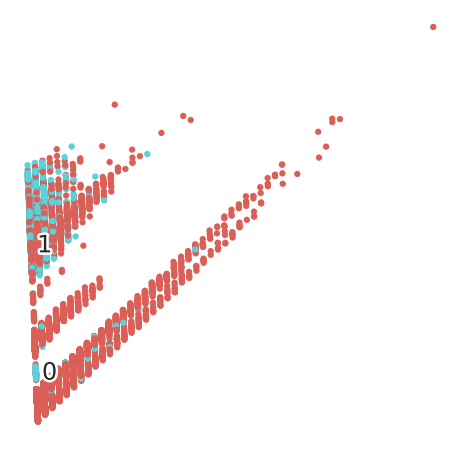

In [137]:
fashion_scatter(pca_result_no_outlier[:,:2], y_train_no_outlier.yes)
plt.show()

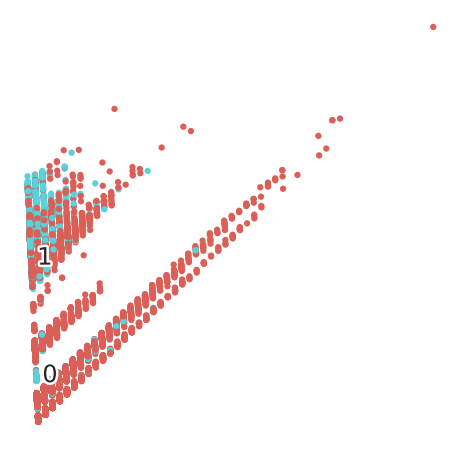

In [139]:
fashion_scatter(pca_result_outlier[:,:2], y_train_outlier.yes)
plt.show()

### t-SNE 

In [140]:
from sklearn.manifold import TSNE

tsne_no_outlier = TSNE(random_state=RS).fit_transform(X_train_no_outlier)
tsne_outlier = TSNE(random_state=RS).fit_transform(X_train_outlier)

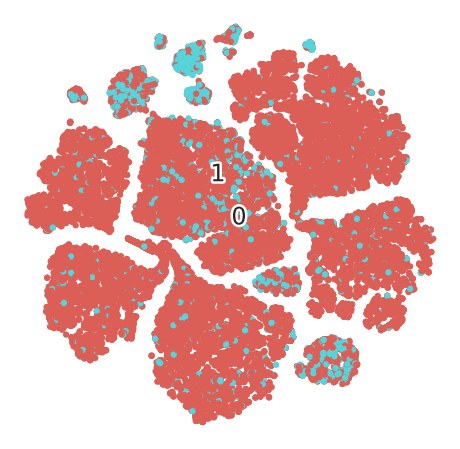

In [183]:
fashion_scatter(tsne_no_outlier, y_train_no_outlier.yes)
plt.show()

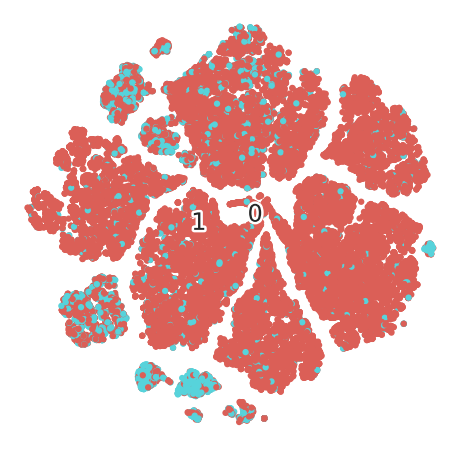

In [184]:
fashion_scatter(tsne_outlier, y_train_outlier.yes)
plt.show()

# K-fold

### With out outliers

In [186]:
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn import metrics


def cross_validate(model, n_splits, n_components, X_train, y_train):
    pca = PCA(n_components=n_components)

    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = {'accuracy':[], 'precision':[], 'recall':[], 
              'f1_score':[], 'r2_score':[], 'roc':[]}

    for train_ix, test_ix in kfold.split(X_train, y_train):

        k_train_X = X_train.iloc[train_ix].values
        k_test_X  = X_train.iloc[test_ix].values
        k_train_y = y_train.iloc[train_ix].values.ravel()
        k_test_y  = y_train.iloc[test_ix].values.ravel()

        pca_train_X = pca.fit_transform(k_train_X)
        pca_test_X = pca.fit_transform(k_test_X)

        #logistic regression
        model.fit(pca_train_X, k_train_y)

        y_pred=model.predict(pca_test_X)

        #print(metrics.confusion_matrix(test_y, y_pred))
        scores["accuracy"].append(metrics.accuracy_score(k_test_y, y_pred))
        scores["precision"].append(metrics.precision_score(k_test_y, y_pred))
        scores["recall"].append(metrics.recall_score(k_test_y, y_pred))
        scores["f1_score"].append(metrics.f1_score(k_test_y, y_pred))
        scores["r2_score"].append(metrics.r2_score(k_test_y, y_pred))
        scores["roc"].append(metrics.roc_auc_score(k_test_y, y_pred))

    for key, value in scores.items():
        scores[key] = np.mean(value)
    
    pca_train_X = pca.fit_transform(X_train.values)
    y_train = y_train.values.ravel()
    model.fit(pca_train_X, y_train)
    
    return model, scores

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

models = [LogisticRegression(), 
          xgb.XGBClassifier(),  
          MLPClassifier(solver='lbfgs', max_iter=300, 
                        alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)]

for model in models:
    model, score = cross_validate(model, 10, n_components_no_outlier, 
                                  X_train_no_outlier, y_train_no_outlier)
    print(type(model).__name__)
    for key, value in score.items():
        print('{} : {:.3}'.format(key, value))
    
    print('\n')

LogisticRegression
accuracy : 0.904
precision : 0.669
recall : 0.185
f1_score : 0.289
r2_score : -0.0155
roc : 0.587


XGBClassifier
accuracy : 0.899
precision : 0.555
recall : 0.217
f1_score : 0.311
r2_score : -0.0711
roc : 0.598


MLPClassifier
accuracy : 0.9
precision : 0.586
recall : 0.208
f1_score : 0.305
r2_score : -0.0568
roc : 0.595


